In [1]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
ROOT.ROOT.EnableImplicitMT()

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.cc","k")

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/functions.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/functions.cc","k")

Welcome to JupyROOT 6.28/00


In [2]:
date = "SEP13"
channel = "phi"
mesonCat = ""
mesonNum = 0
if (channel == "omega"):
    mesonCat = "OmegaCat"
    mesonNum = 1038
elif (channel == "phi"):
    mesonCat = "Phi3Cat"
    mesonNum = 1039
elif (channel == "d0starrho"):
    mesonCat = "D0StarRhoCat"
    mesonNum = 1040
elif (channel == "d0star"):
    mesonCat = "D0StarCat"
    mesonNum = 1041
else:
    raise Exception("Wrong channel.")

chainSGN = ROOT.TChain("events")
chainSGN.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc{1}_GFcat_{2}_2018.root".format(date, mesonNum, mesonCat))

chainBKG = ROOT.TChain("events")
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc10_GFcat_{1}_2018.root".format(date, mesonCat))
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc11_GFcat_{1}_2018.root".format(date, mesonCat))
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc12_GFcat_{1}_2018.root".format(date, mesonCat))
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc13_GFcat_{1}_2018.root".format(date, mesonCat))
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc14_GFcat_{1}_2018.root".format(date, mesonCat))

dfSGN = ROOT.RDataFrame(chainSGN)
dfSGN = (dfSGN.Define("scale", "w*lumiIntegrated"))


dfBKG = ROOT.RDataFrame(chainBKG)
dfBKG = (dfBKG.Define("scale", "w*lumiIntegrated"))

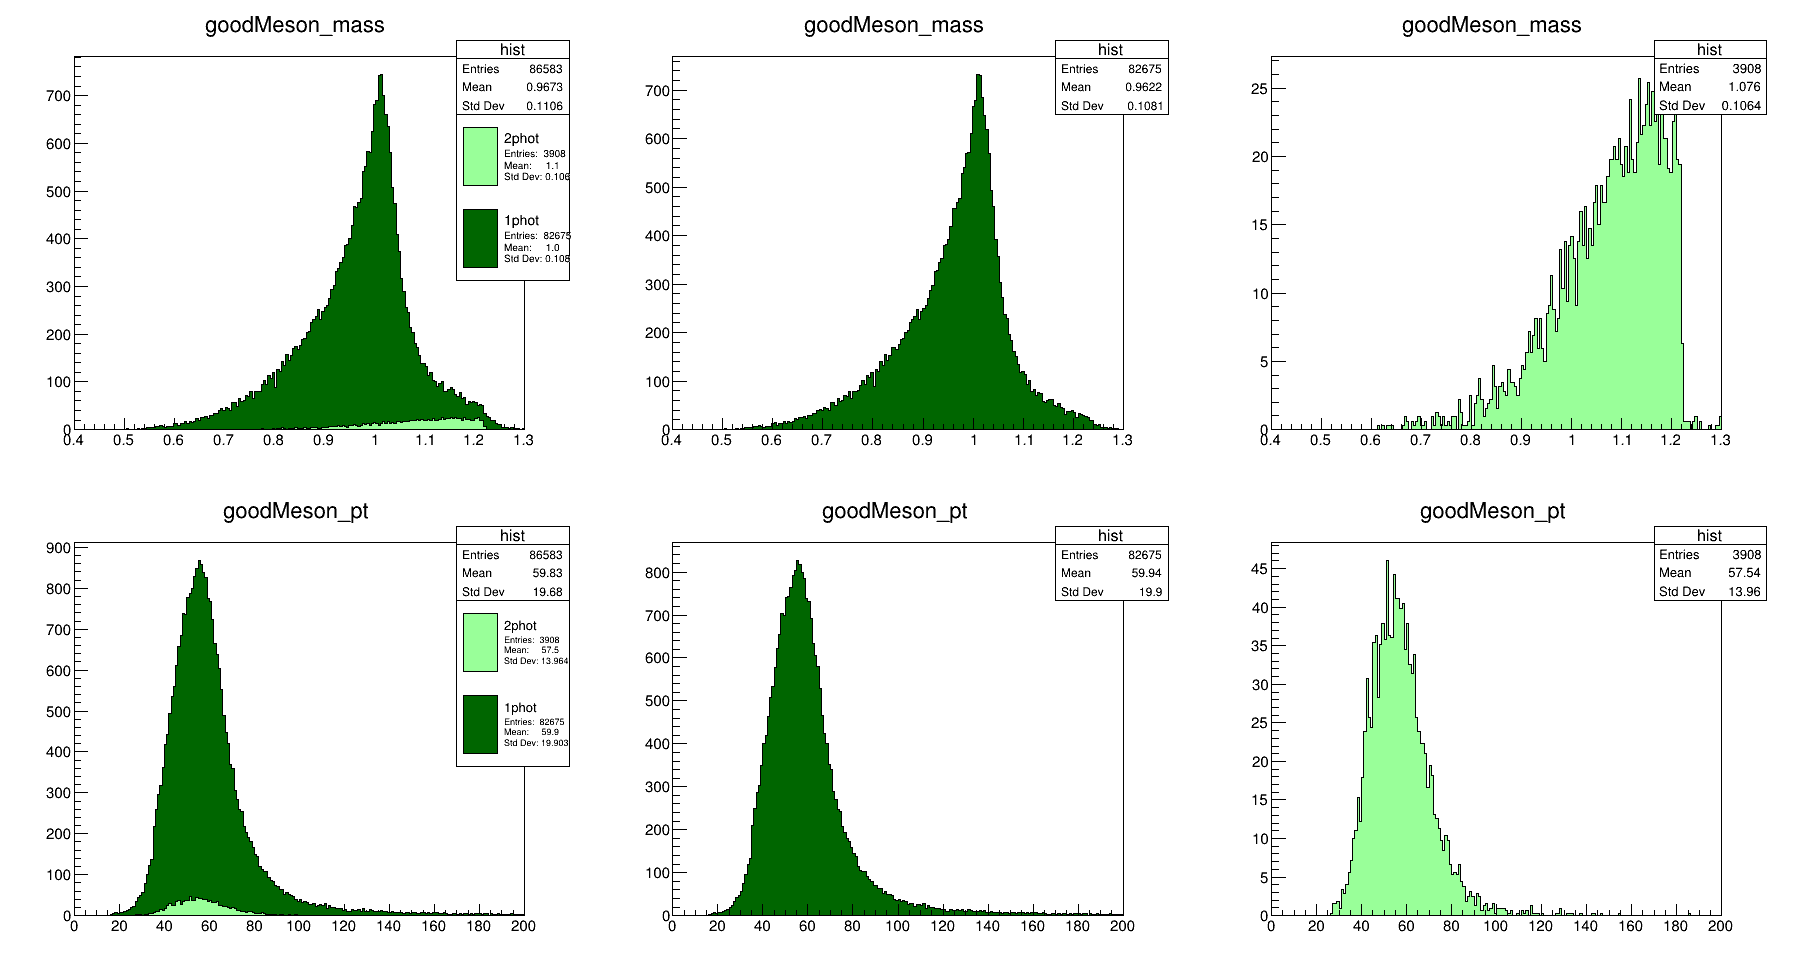

In [3]:
canvas = ROOT.TCanvas("canvas", "canvas", 1800, 1000)
canvas.Divide(3, 2)

nbins, xlow, xhigh = 200, 0.4, 1.3

p = canvas.cd(1)
h = dfSGN.Histo1D(("hist", "goodMeson_mass", nbins, xlow, xhigh), "goodMeson_mass", "scale")
h.SetFillColor(ROOT.kGreen-9)
h.SetLineWidth(0)
h.Draw("hist")
h1 = dfSGN.Filter("goodMeson_Nphotons[0] == 1").Histo1D(("hist", "goodMeson_mass", nbins, xlow, xhigh), "goodMeson_mass", "scale").GetValue()
h2 = dfSGN.Filter("goodMeson_Nphotons[0] > 1").Histo1D(("hist", "goodMeson_mass", nbins, xlow, xhigh), "goodMeson_mass", "scale").GetValue()

h1.SetFillColor(ROOT.kGreen+3)
h1.SetLineColor(ROOT.kBlack)
h2.SetFillColor(ROOT.kGreen-9)
h2.SetLineColor(ROOT.kBlack)

stackGEN1 = ROOT.THStack("stack", "goodMeson_mass")
stackGEN1.Add(h2)
stackGEN1.Add(h1)
stackGEN1.Draw("hist same")
legendGEN1 = ROOT.TLegend(0.78, 0.42, 0.98, 0.775)
legendGEN1.AddEntry(h2, "#splitline{{#splitline{{#scale[1.4]{{2phot}}}}{{Entries:  {0}}}}}{{#splitline{{Mean:     {1}}}{{Std Dev: {2}}}}}".format(int(h2.GetEntries()), round(h2.GetMean(), 1), round(h2.GetStdDev(), 3)), "f")
legendGEN1.AddEntry(h1, "#splitline{{#scale[1.4]{{1phot}}}}{{#splitline{{Entries:  {0}}}{{#splitline{{Mean:     {1}}}{{Std Dev: {2}}}}}}}".format(int(h1.GetEntries()), round(h1.GetMean(), 1), round(h1.GetStdDev(), 3)), "f")
legendGEN1.SetEntrySeparation(0.79)
legendGEN1.SetMargin(0.42)
legendGEN1.Draw()

p = canvas.cd(2)
h1.Draw("hist")

p = canvas.cd(3)
h2.Draw("hist")



nbins, xlow, xhigh = 200, 0.0, 200.

p = canvas.cd(4)
hpt = dfSGN.Histo1D(("hist", "goodMeson_pt", nbins, xlow, xhigh), "goodMeson_pt", "scale")
hpt.SetFillColor(ROOT.kGreen-9)
hpt.SetLineWidth(0)
hpt.Draw("hist")
h1pt = dfSGN.Filter("goodMeson_Nphotons[0] == 1").Histo1D(("hist", "goodMeson_pt", nbins, xlow, xhigh), "goodMeson_pt", "scale").GetValue()
h2pt = dfSGN.Filter("goodMeson_Nphotons[0] > 1").Histo1D(("hist", "goodMeson_pt", nbins, xlow, xhigh), "goodMeson_pt", "scale").GetValue()

h1pt.SetFillColor(ROOT.kGreen+3)
h1pt.SetLineColor(ROOT.kBlack)
h2pt.SetFillColor(ROOT.kGreen-9)
h2pt.SetLineColor(ROOT.kBlack)

stackGEN2 = ROOT.THStack("stack", "goodMeson_pt")
stackGEN2.Add(h2pt)
stackGEN2.Add(h1pt)
stackGEN2.Draw("hist same")
legendGEN2 = ROOT.TLegend(0.78, 0.42, 0.98, 0.775)
legendGEN2.AddEntry(h2, "#splitline{{#splitline{{#scale[1.4]{{2phot}}}}{{Entries:  {0}}}}}{{#splitline{{Mean:     {1}}}{{Std Dev: {2}}}}}".format(int(h2pt.GetEntries()), round(h2pt.GetMean(), 1), round(h2pt.GetStdDev(), 3)), "f")
legendGEN2.AddEntry(h1, "#splitline{{#scale[1.4]{{1phot}}}}{{#splitline{{Entries:  {0}}}{{#splitline{{Mean:     {1}}}{{Std Dev: {2}}}}}}}".format(int(h1pt.GetEntries()), round(h1pt.GetMean(), 1), round(h1pt.GetStdDev(), 3)), "f")
legendGEN2.SetEntrySeparation(0.79)
legendGEN2.SetMargin(0.42)
legendGEN2.Draw()

p = canvas.cd(5)
h1pt.Draw("hist")

p = canvas.cd(6)
h2pt.Draw("hist")

canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


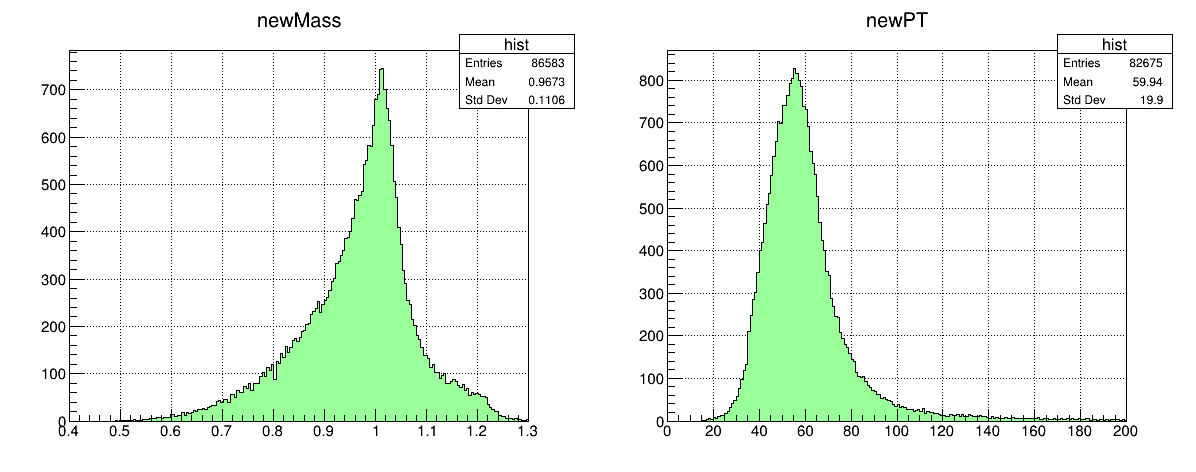

In [4]:
dfSGN = (dfSGN.Define("newMass", '''goodMeson_Nphotons[0] == 1 ? Vec_f {sum2Body(goodMeson_ditrk_pt[0], goodMeson_ditrk_eta[0], goodMeson_ditrk_phi[0], goodMeson_ditrk_mass[0], 
	goodMeson_photon1_pt[0], goodMeson_photon1_eta[0], goodMeson_photon1_phi[0], 0.1349766).M()} : goodMeson_mass''')
    .Define("newPT", '''sum3Body(goodMeson_ditrk_pt[0], goodMeson_ditrk_eta[0], goodMeson_ditrk_phi[0], goodMeson_ditrk_mass[0], 
	goodMeson_photon1_pt[0], goodMeson_photon1_eta[0], goodMeson_photon1_phi[0], 0.1349766,
	0.0, 0.0, 0.0, 0.0).Pt()'''))

canvas = ROOT.TCanvas("canvas", "canvas", 1200, 500)
canvas.Divide(2, 1)

p = canvas.cd(1)
nbins, xlow, xhigh = 200, 0.4, 1.3
hNewMass = dfSGN.Histo1D(("hist", "newMass", nbins, xlow, xhigh), "newMass", "scale")
hNewMass.SetFillColor(ROOT.kGreen-9)
hNewMass.SetLineColor(ROOT.kBlack)
hNewMass.Draw("hist")
p.SetGrid()

p = canvas.cd(2)
nbins, xlow, xhigh = 200, 0.0, 200.
hNewPt = dfSGN.Filter("goodMeson_Nphotons[0] == 1").Histo1D(("hist", "newPT", nbins, xlow, xhigh), "newPT", "scale")
hNewPt.SetFillColor(ROOT.kGreen-9)
hNewPt.SetLineColor(ROOT.kBlack)
hNewPt.Draw("hist")
p.SetGrid()

canvas.Draw()

In [5]:
cols = ["newMass", "goodMeson_mass", "HCandMass"]
x = dfSGN.AsNumpy(columns=cols)
pddf = pd.DataFrame(x)
display(pddf)

,newMass,goodMeson_mass,HCandMass
0,[1.0106850862503052],[1.0106850862503052],122.755188
1,[0.90625],[0.90625],118.591164
2,[1.044277310371399],[1.044277310371399],119.722176
3,[1.0279817581176758],[1.0279817581176758],120.712112
4,[0.9364577531814575],[0.9364577531814575],126.636337
...,...,...,...
86578,[1.0750370025634766],[1.0750370025634766],129.682312
86579,[0.8169115781784058],[0.8169115781784058],123.098625
86580,[0.998534083366394],[0.998534083366394],125.179039
86581,[0.96875],[0.96875],125.742500


MASS STD RECO:	 0.13015594858090765
MASS STD NEW :	 0.11772541567965646 -0.09550491573210051
PT STD RECO:	 5.200479223997085
PT STD NEW :	 5.200479260530566


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


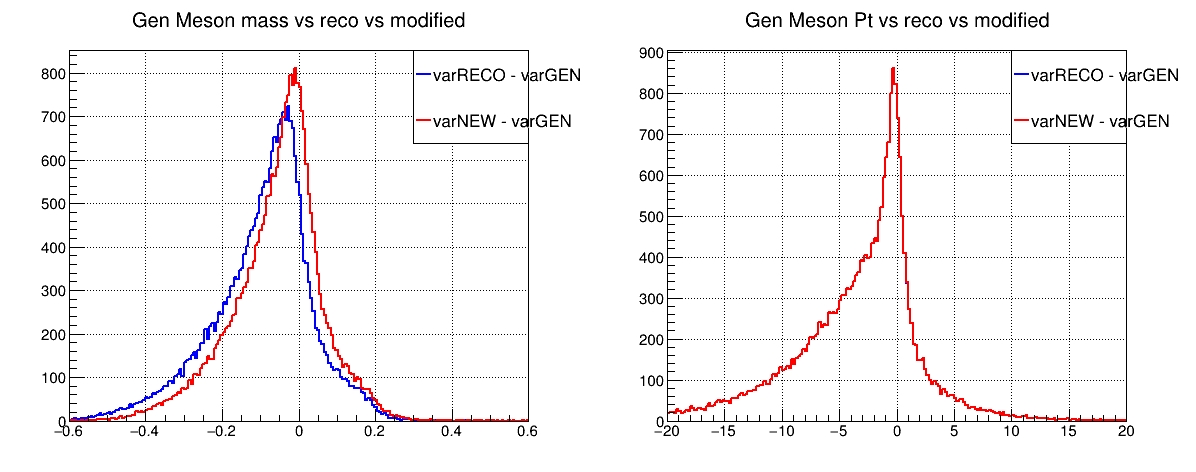

In [142]:
canvas = ROOT.TCanvas("canvas", "canvas", 1200, 500)
canvas.Divide(2, 1)

nbins, xlow, xhigh = 200, -0.6, 0.6
p = canvas.cd(1)
hrecodiff = dfSGN.Define("RecoDiff", "goodMeson_mass - goodMeson_mass_GEN").Histo1D(("hist", "title", nbins, xlow, xhigh), "RecoDiff", "scale").GetValue()
hrecodiff.SetLineWidth(2)
hrecodiff.SetLineColor(ROOT.kBlue)
#hrecodiff.Draw("hist")

hnewdiff = dfSGN.Define("NewDiff", "newMass - goodMeson_mass_GEN").Histo1D(("hist", "title", nbins, xlow, xhigh), "NewDiff", "scale").GetValue()
hnewdiff.SetLineWidth(2)
hnewdiff.SetLineColor(ROOT.kRed)
#hnewdiff.Draw("hist")

stack4 = ROOT.THStack("stack", "Gen Meson mass vs reco vs modified")
stack4.Add(hrecodiff)
stack4.Add(hnewdiff)
stack4.Draw("hist nostack")
legend4 = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend4.SetMargin(0.17)
#legend.SetBorderSize(0)
legend4.SetTextSize(0.04)
legend4.AddEntry(hrecodiff, "varRECO - varGEN", "l")
legend4.AddEntry(hnewdiff, "varNEW - varGEN", "l")
legend4.Draw()

p.SetGrid()

nbins, xlow, xhigh = 200, -20., 20.
p = canvas.cd(2)
hrecodiffPt = dfSGN.Filter("goodMeson_Nphotons[0] == 1").Define("RecoDiffPt", "goodMeson_pt - goodMeson_pt_GEN").Histo1D(("hist", "title", nbins, xlow, xhigh), "RecoDiffPt", "scale").GetValue()
hrecodiffPt.SetLineWidth(2)
hrecodiffPt.SetLineColor(ROOT.kBlue)
#hrecodiffPt.Draw("hist")

hnewdiffPt = dfSGN.Filter("goodMeson_Nphotons[0] == 1").Define("NewDiffPt", "newPT - goodMeson_pt_GEN").Histo1D(("hist", "title", nbins, xlow, xhigh), "NewDiffPt", "scale").GetValue()
hnewdiffPt.SetLineWidth(2)
hnewdiffPt.SetLineColor(ROOT.kRed)
#hnewdiffPt.Draw("hist")

stack5 = ROOT.THStack("stack", "Gen Meson Pt vs reco vs modified")
stack5.Add(hrecodiffPt)
stack5.Add(hnewdiffPt)
stack5.Draw("hist nostack")
legend5 = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend5.SetMargin(0.17)
#legend.SetBorderSize(0)
legend5.SetTextSize(0.04)
legend5.AddEntry(hrecodiffPt, "varRECO - varGEN", "l")
legend5.AddEntry(hnewdiffPt, "varNEW - varGEN", "l")
legend5.Draw()

p.SetGrid()


canvas.Draw()

print("MASS STD RECO:\t", hrecodiff.GetStdDev())
print("MASS STD NEW :\t", hnewdiff.GetStdDev(), hnewdiff.GetStdDev()/hrecodiff.GetStdDev()-1)

print("PT STD RECO:\t", hrecodiffPt.GetStdDev())
print("PT STD NEW :\t", hnewdiffPt.GetStdDev())